<a href="https://colab.research.google.com/github/prunojumah/Nairobi-Hospital-test-for-hypothyroidism/blob/main/Independent_Project_Week8_Pruno_Jumah_Moringa_School.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Defining the Question

a) Specifying the Question

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. As a Data Scientist, build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid based on the healthcare datasets provided

b) Defining the Metric for Success

1) The model will deemed a success if it can succefully predit whether or not the patient's symptoms indicate that the patient has hypothyroid.

2) The model achieves atleast 80% accuracy

3) Have the lowest RMSE score possible



c) Understanding the context

The fact that you are of a specific gender

Age (60 years)

Autoimmune diseases e.g celiac disease

Genetic history

Thyroidectomy

Pregnancy

d) Recording the Experimental Design

1. Decision Trees
We will use the following trees to classify a whether a patient has hypothyroididm or tests negatively:

  Random Forest Classifier

  AdaBoost Classifier

  Gradient Boost Classifier

2. SVM Models
We will use the following SVM models to to place a patient in the right category with regards to predicting their hypothyroidism status:

Polynomial

Linear

Rbf


e) Data Relevance

The data provided is enough and relevant to build a relatively correct model to predict whether or not the patient's symptoms indicate that the patient has hypothyroid.

# 2. Importing relevant libraries



In [1]:
#Importing the relevant libraries

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from IPython.core.pylabtools import figsize

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

from sklearn.feature_extraction import DictVectorizer

import xgboost as xgb

from sklearn.model_selection import cross_val_score

from sklearn_pandas import DataFrameMapper, CategoricalImputer

from sklearn.pipeline import FeatureUnion

from sklearn.preprocessing import FunctionTransformer

from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC

from sklearn import metrics

from sklearn.metrics import accuracy_score

from sklearn.tree import export_graphviz

from sklearn.externals.six import StringIO  

from IPython.display import Image  

import pydotplus

from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


# 3. Loading and checking the data

In [2]:
# Previewing the head of the dataset

hypo = pd.read_csv('/content/hypothyroid.csv')
hypo.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [3]:
# Previewing the tail of the dataset

hypo.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [4]:
# Checking the data's information

hypo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [5]:
# Getting a general description of the data

hypo.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


In [6]:
# Checking for missing values

hypo.isnull().sum()

# Shows that null values do not exist in our dataset
# However, '?' are not considered as null values although they exist in our dataset
# Therefore this '?' signs should be replaced with zeros

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [7]:
# Replacing '?' with zeros

hypo = hypo.replace(['?'], np.nan)
hypo.isnull().sum().sum()

# There are 5329 entries with the '?' symbol
# which have been replaced with the zeros/null

5329

In [8]:
# Checking the column's data types

hypo.dtypes

# All columns have the data type of objects

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [9]:
# Checking the unique values in each column using a for loop


for column in hypo.columns:
  print(column)
  print(hypo[column].unique())
  print(hypo[column].nunique())
  print('\n')

status
['hypothyroid' 'negative']
2


age
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' nan '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
92


sex
['M' 'F' nan]
2


on_thyroxine
['f' 't']
2


query_on_thyroxine
['f' 't']
2


on_antithyroid_medication
['f' 't']
2


thyroid_surgery
['f' 't']
2


query_hypothyroid
['f' 't']
2


query_hyperthyroid
['f' 't']
2


pregnant
['f' 't']
2


sick
['f' 't']
2


tumor
['f' 't']
2


lithium
['f' 't']
2


goitre
['f' 't']
2


TSH_measured
['y' 'n']
2


TSH
['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '5

In [10]:
# changing the column datatypes by creating arrays of numerical columns
# and categorical columns

# Creating a copy
hypo2 = hypo

categorical_columns = ['sex', 'on_thyroxine','query_on_thyroxine','on_antithyroid_medication',
                       'thyroid_surgery','query_hypothyroid','query_hyperthyroid', 'pregnant',
                       'sick','tumor', 'lithium', 'goitre', 'TSH_measured', 'T3_measured', 
                       'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']

# Numerical columns array 
numerical_columns = ['age','TSH','T3', 'TT4', 'T4U', 'FTI' , 'TBG']


# Using a conditional for loop to convert each columns into the right data types

for column in hypo2.columns:
  if column in numerical_columns:
    hypo2[column]= pd.to_numeric(hypo2[column])
  
  else:
    hypo2[column] = hypo2[column].astype('category')
    
    
# Confirming changes

hypo2.dtypes

# The data types have now been set correctly

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
TBG                           float64
dtype: objec

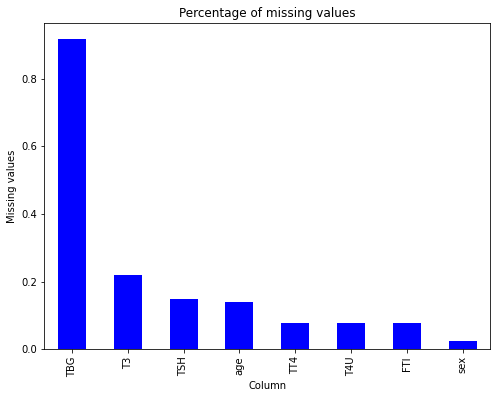

In [11]:
# Visualising missing values

hypo2.isna().mean().round(4).sort_values(ascending = False)[:8].plot(kind = 'bar', figsize = (8, 6), color = 'blue')
plt.title('Percentage of missing values')
plt.ylabel('Missing values')
plt.xlabel('Column')
plt.show()

In [12]:
# Replacing the null values in the age column with the mean age

hypo2['age']= hypo2['age'].fillna(hypo2['age'].mean(), axis = 0)

In [13]:
# Replacing the null values in the sex column with the modal value

hypo2['sex']= hypo2['sex'].fillna(hypo2['sex'].mode(), axis = 0)

In [14]:
# Replacing the null values with zeroes
# Defining the array of numerical columns to use.

numerical_columns_2 = ['TSH','T3', 'TT4', 'T4U', 'FTI']

#dropping the null values and assigning the resultant values to a new dataframe
hypo2[numerical_columns_2] = hypo2[numerical_columns_2].fillna(0)

## Dealing with duplicate values

In [15]:
# Number of duplicated rows

hypo2.duplicated().sum()

77

In [16]:
# Dropping of duplicated entries since they cause noise in the model

hypo2 = hypo2.drop_duplicates()

# Confirming the dropping of duplicates

hypo2.duplicated().sum()

# 0 indicates there are no duplicated entries

0

## Univariate Analysis

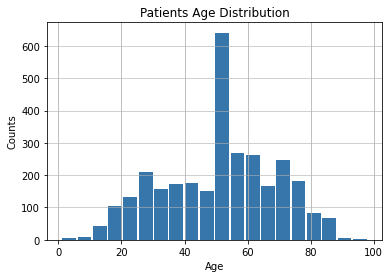

In [17]:
# Visualizing the age distribution

#visualizing age dirstibution
size, scale = 1000, 10
age = hypo2['age']

age.plot.hist(grid=True, bins=20, rwidth=0.9, color='#3776ab')
plt.title('Patients Age Distribution')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

In [18]:
hypo2.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [19]:
#creating a copy and dropping the TBG column since it has too many null values which
#means that it does not give any meaningful information. 
hypo2 = hypo2.drop(['TBG'], axis =1)


## Using boxplots to check for outliers

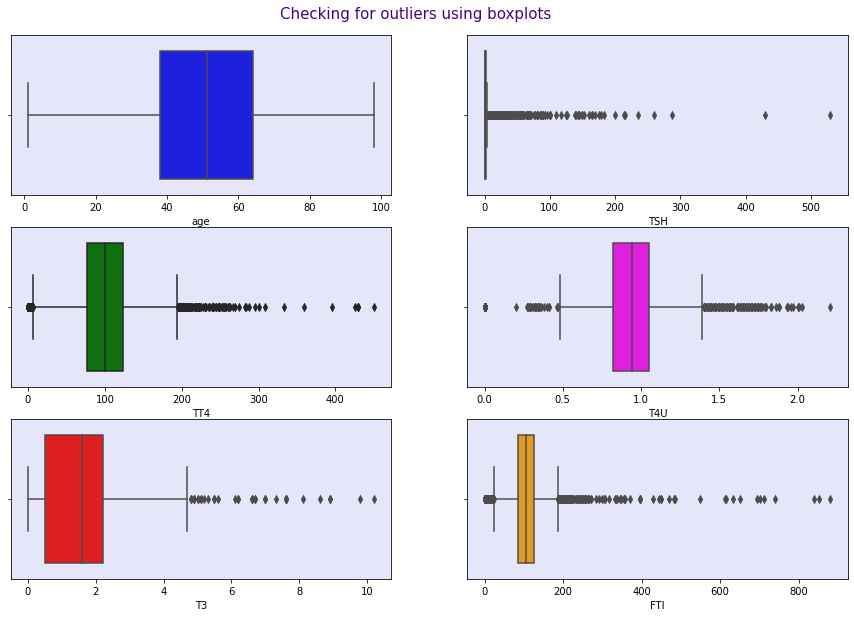

In [20]:
# Using a boxplot to check for outliers

# Creating a list of columns to check for outliers
# Creating a list of colors

import seaborn as sns

cols = ['age', 'TSH', 'TT4', 'T4U', 'T3', 'FTI', 'TBG']
colors = ['blue', 'yellow', 'green', 'fuchsia', 'red', 'orange']

# Plotting boxplots of the col_list columns to check for outliers
#
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (15, 10))
plt.suptitle('Checking for outliers using boxplots', fontsize = 15, y = 0.92, color = 'indigo')
for ax, data, column, color in zip(axes.flatten(), hypo2, cols, colors):
  sns.boxplot(hypo2[column], ax = ax, color = color)
  ax.set_facecolor('lavender')
  
# Setting the background color to lavender
# The boxplots above indicate the extent of outliers in each of the above columns

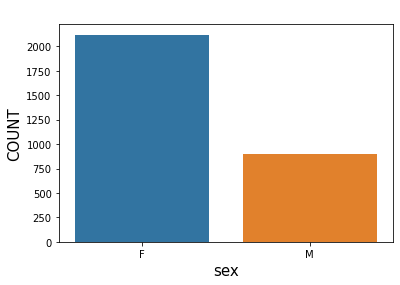

In [21]:
#visualizing the distribution of gender in the dataset

import seaborn as sb
sb.countplot('sex',data = hypo2)
plt.xlabel("sex",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of Gender",fontsize=16,color="white")
plt.show()

# There are more females than males in our dataset

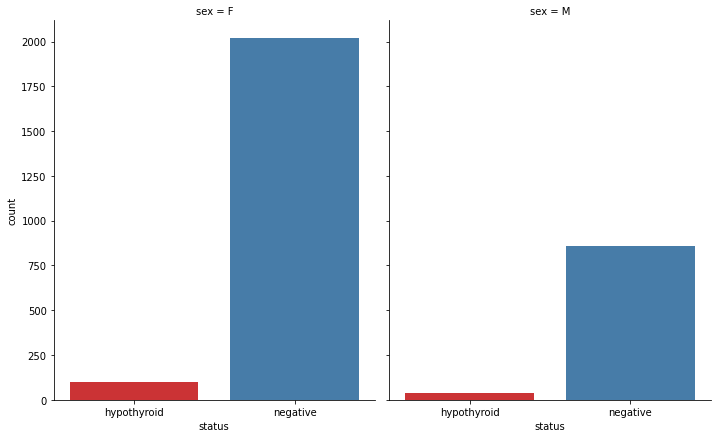

In [22]:
# Plotting bar charts

sns.catplot("status", col="sex", col_wrap=4, data=hypo2, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()

# Bar graph showing the distribution of hypothyroidism among the different genders
# More females are prone to contracting the disease as compared to the males

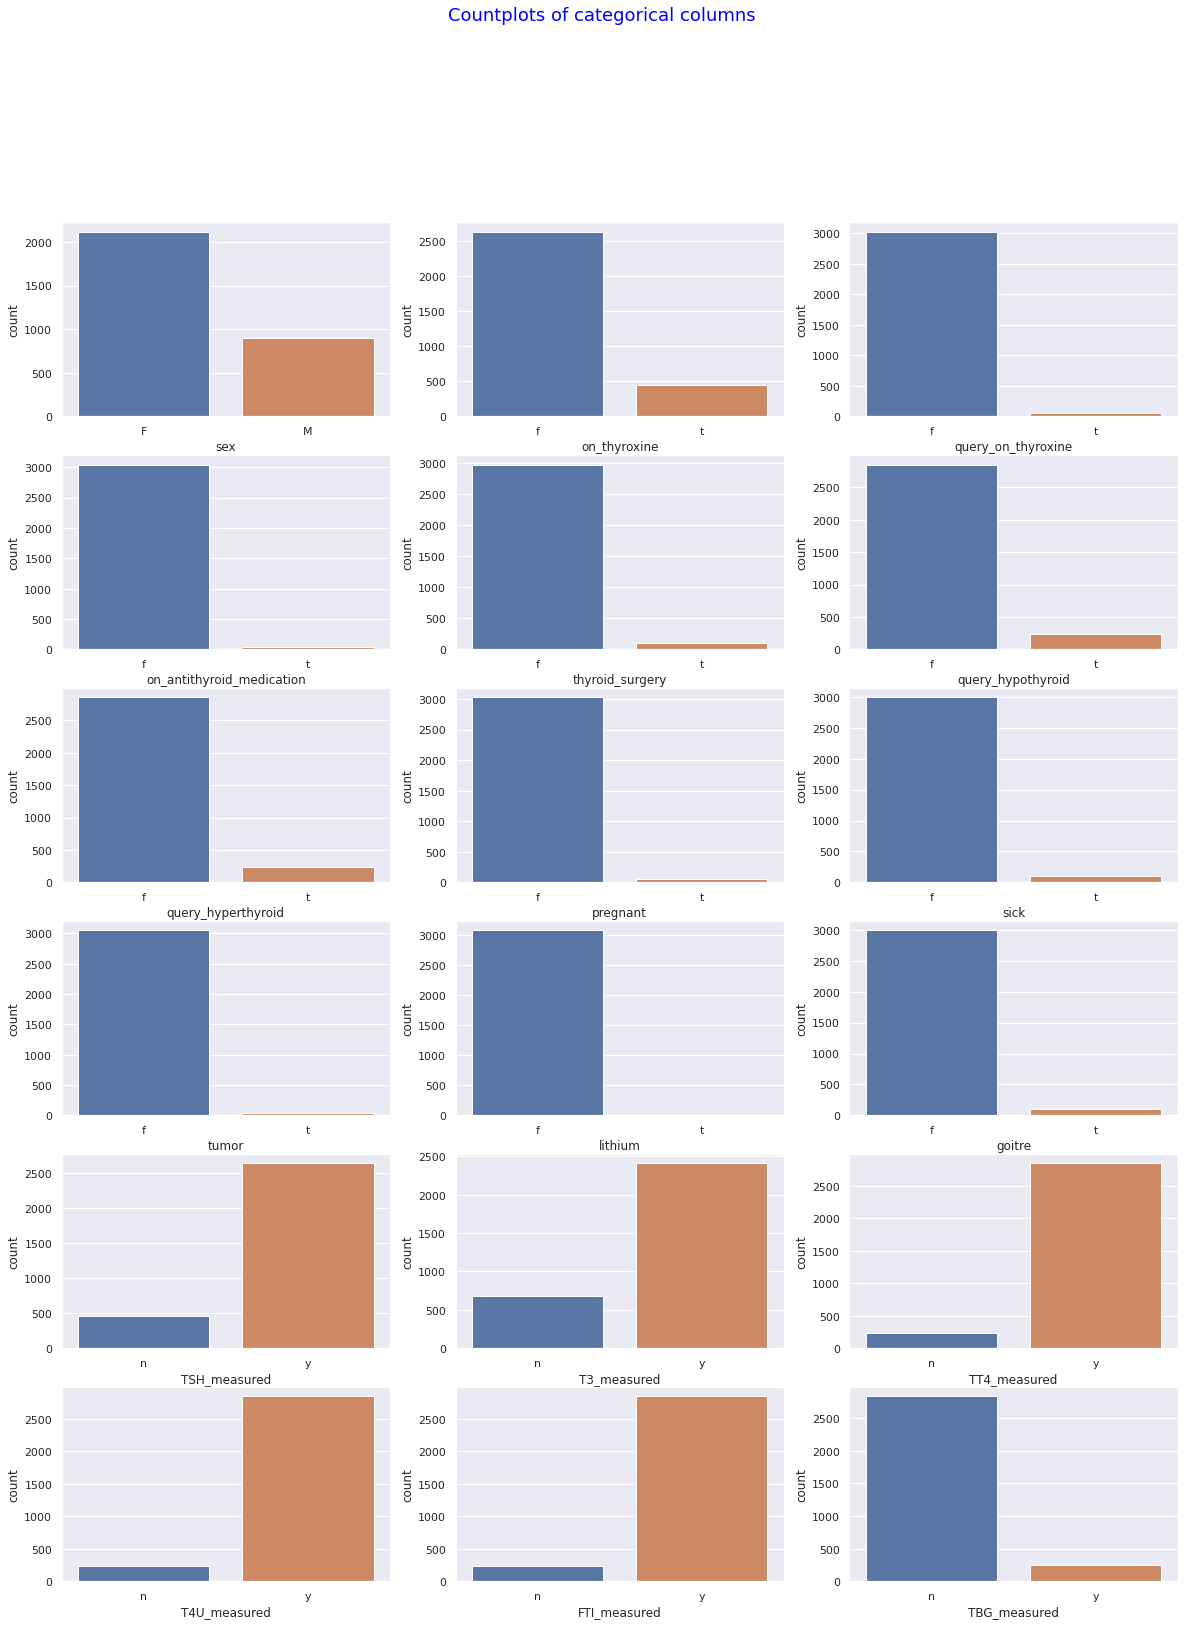

In [23]:
# Count plot of categorical columns in the dataset

categorical_columns_1 =[ 'sex', 'on_thyroxine', 'query_on_thyroxine',
      'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
      'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
      'TSH_measured', 'T3_measured', 'TT4_measured',
      'T4U_measured', 'FTI_measured', 'TBG_measured']


sb.set(style = 'darkgrid', context = 'notebook')
corr = hypo2.corr()
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20,25))
plt.suptitle('Countplots of categorical columns', fontsize = 18, y = 1, color = 'blue')
for ax, data, column in zip(axes.flatten(), hypo2, categorical_columns_1):
   sb.countplot(hypo2[column], ax=ax)

## Bivariate Analysis

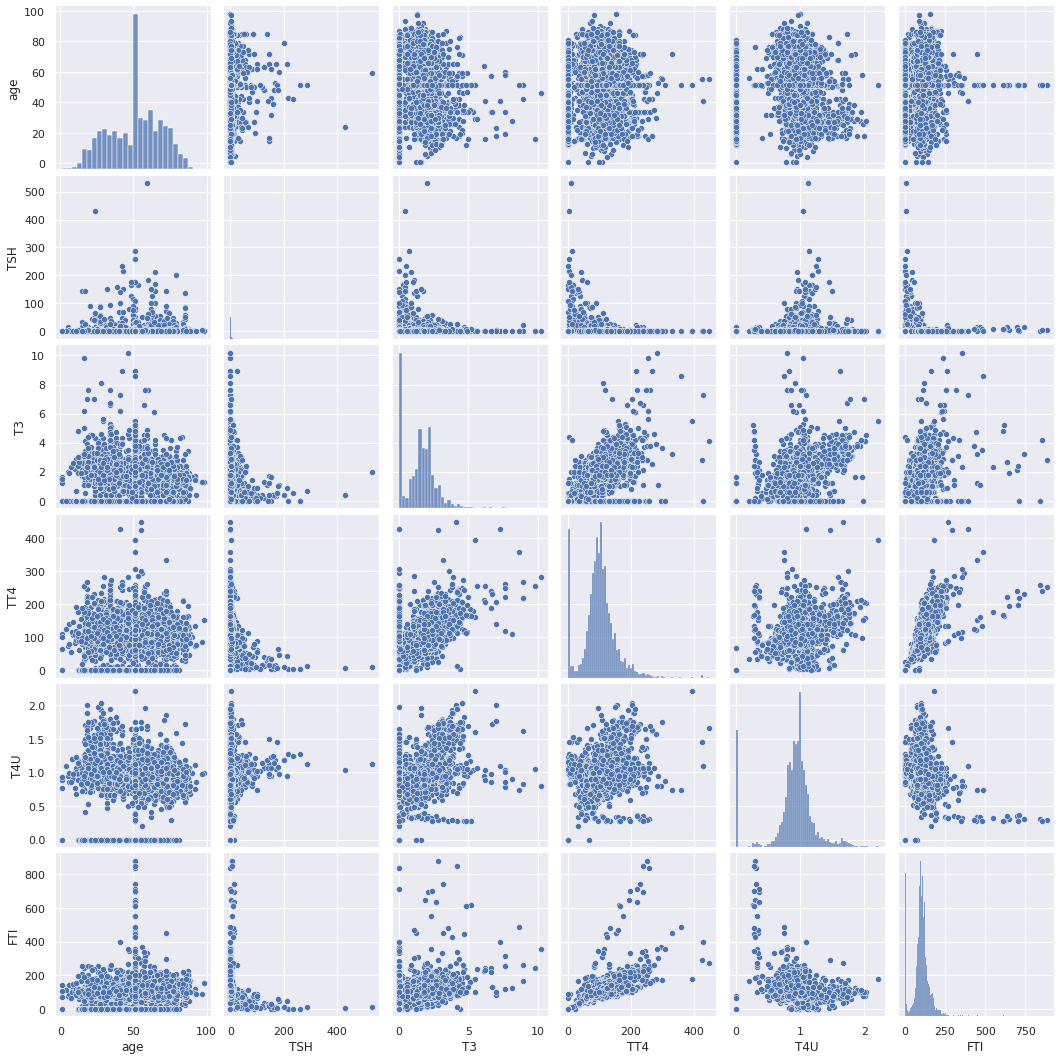

In [24]:
# Use of a pairplot to check for correlation between variables.

sns.pairplot(hypo2, kind = 'scatter', dropna = False)
plt.show()

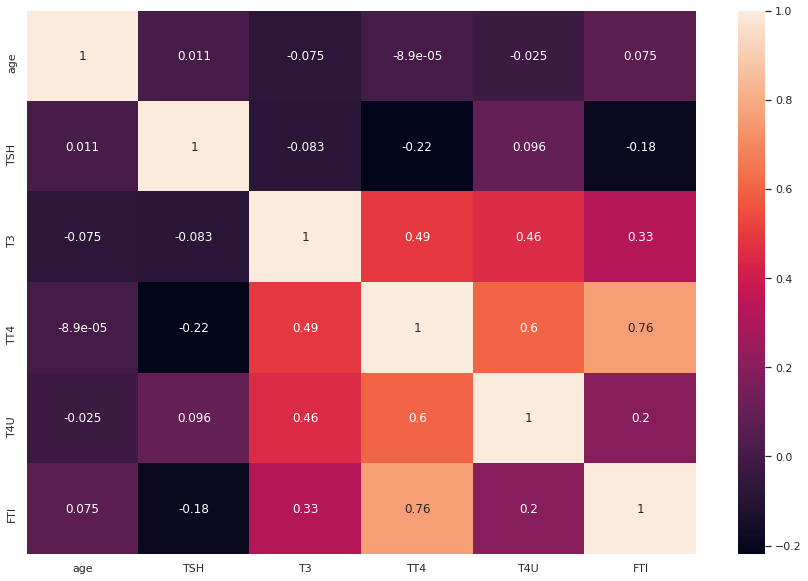

In [25]:
# Checking the extent of correlation using a heatmap

plt.figure(figsize=(15,10))
sb.heatmap(corr, annot = True)
plt.show()
# The light shaded intersections have high correlation
# while the purple intersections have little or no correlation.


Checking for multicollinearity

In [26]:
# Displaying the correlations between the variables

corr = hypo2.corr()
corr

,age,TSH,T3,TT4,T4U,FTI
age,1.000000,0.011431,-0.074543,-0.000089,-0.024815,0.074604
TSH,0.011431,1.000000,-0.083445,-0.219696,0.096258,-0.183648
T3,-0.074543,-0.083445,1.000000,0.493887,0.455964,0.326356
TT4,-0.000089,-0.219696,0.493887,1.000000,0.600486,0.758395
T4U,-0.024815,0.096258,0.455964,0.600486,1.000000,0.196093
FTI,0.074604,-0.183648,0.326356,0.758395,0.196093,1.000000


<function matplotlib.pyplot.show>

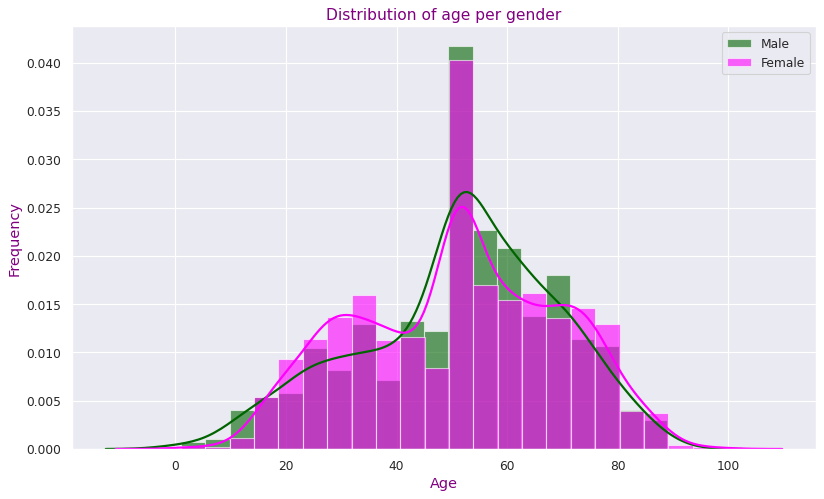

In [27]:
# Plotting histogram to show distribution of age per gender
# 
male = hypo2.loc[hypo2.sex=='M', 'age']    # Selecting only male datapoints in the age column
female = hypo2.loc[hypo2.sex=='F', 'age']  # Selecting only female datapoints in the age column

# Creating a dictionary containing opacaticy and line width in a dictionary for efficiency
#
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

# Plotting the histograms
#
plt.figure(figsize=(12,7), dpi= 80)
sns.distplot(male, color="darkgreen", label="Male", **kwargs)
sns.distplot(female, color="fuchsia", label="Female", **kwargs)
plt.title('Distribution of age per gender', fontsize = 14, color = 'purple')
plt.xlabel('Age', fontsize = 13, color = 'purple')
plt.ylabel('Frequency', fontsize = 13, color = 'purple')
plt.legend()
plt.show

## Multivariate Analysis

In [28]:
# Encoding status variable

# Finding the appropriate PCA

from sklearn.decomposition import PCA

np.random.seed(0)

X = hypo2.drop('status', axis=1)

X = pd.get_dummies(X)

train_features = X

model = PCA(n_components=9).fit(train_features)

# number of components
n_pcs= model.components_.shape[0]
# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = [ 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query3hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured']
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
# build the dataframe
df = pd.DataFrame(dic.items())
df

,0,1
0,PC0,thyroid_surgery
1,PC1,query_on_thyroxine
2,PC2,sex
3,PC3,age
4,PC4,on_thyroxine
5,PC5,on_thyroxine
6,PC6,query3hypothyroid
7,PC7,pregnant
8,PC8,TT4_measured


## Modelling

In [29]:
# Creating a baseline model, i.e logistic regression
# Importing the relevant libraries

from sklearn.linear_model import LogisticRegression

y = hypo2.status.cat.codes

# Split the independent and dependent variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

y_pred = LogReg.predict(X_test)

In [30]:
print('accuracy_score:',accuracy_score (y_test , y_pred))
print('F1_score, average = micro:',f1_score(y_test, y_pred, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, y_pred, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, y_pred, average='weighted'))
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

# The Baseline Model has an accuracy score of 98% as seen from the F1 score
# macro Calculates metrics for each label and findS their unweighted mean without
# taking into account label imbalance.

accuracy_score: 0.9881209503239741
F1_score, average = micro: 0.9881209503239741
F1_score, average = macro: 0.9194470585444163
F1_score, average = weighted: 0.9875587079351353


array([[ 30,   9],
       [  2, 885]])

## Decision Trees

Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [32]:
# Import the model
from sklearn.ensemble import RandomForestClassifier

# The random_state variable is here to guarantee that we all see the same numbers.
forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 10, max_depth=5)

forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.head(5)

,Actual,Predicted
1188,1,1
1205,1,1
713,1,1
2791,1,1
1318,1,1


In [33]:
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
print("R2 score : %.2f" % r2_score(y_test,y_pred))

print('accuracy_score:',accuracy_score (y_test , y_pred))

#computing the F1 score since the data is unbalanced
print('F1_score, average = micro:',f1_score(y_test, y_pred, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, y_pred, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, y_pred, average='weighted'))

R2 score : 0.73
accuracy_score: 0.9892008639308856
F1_score, average = micro: 0.9892008639308856
F1_score, average = macro: 0.9257655924322591
F1_score, average = weighted: 0.9886080109262254


In [34]:
# Assessing the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.01079913606911447
Mean Squared Error: 0.01079913606911447
Root Mean Squared Error: 0.10391889178159316


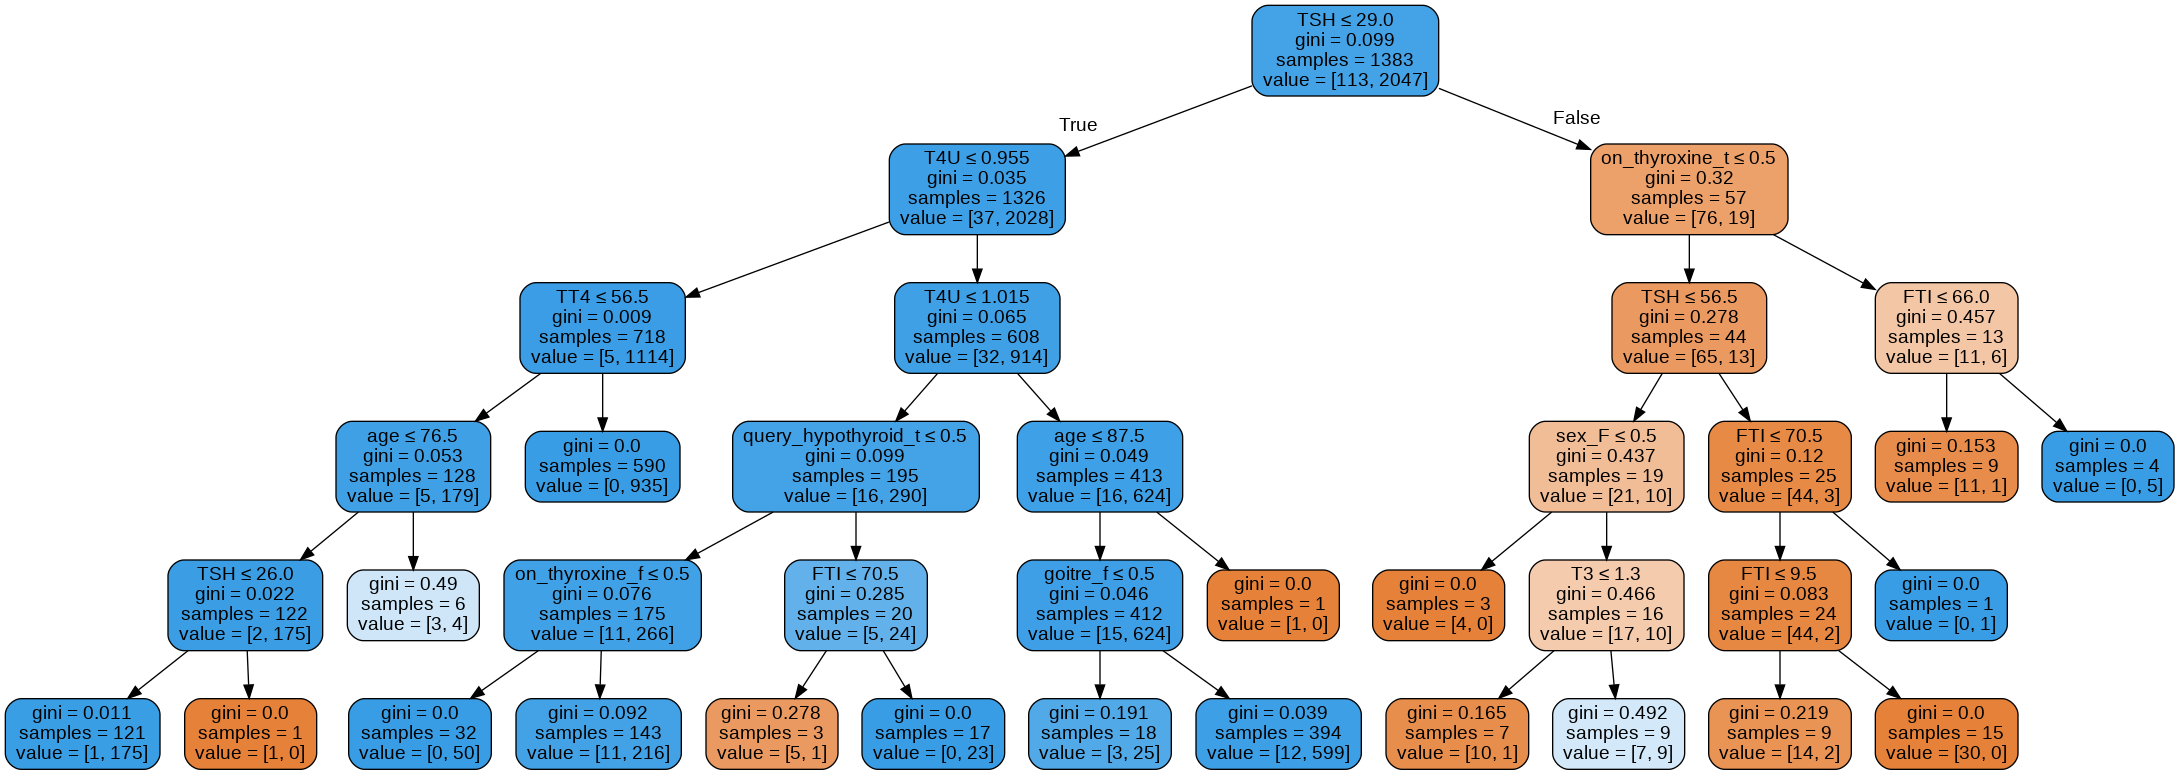

In [35]:
# Visualizing tree number 20

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

y_pred = forest.predict(X_test)
dot_data = StringIO()

# picking a specific tree from the forest; tree  number 50

tree = forest.estimators_[20]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hypothyroid_Test.png')
Image(graph.create_png())

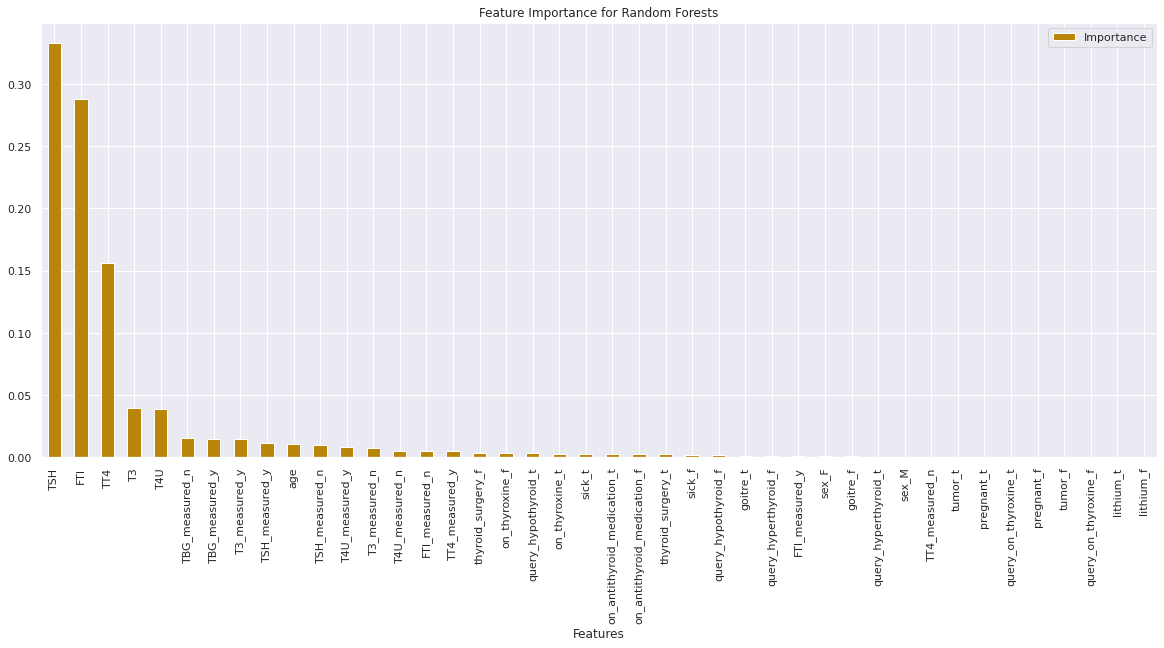

In [36]:
# Getting the feature importance

pd.DataFrame({'Features' : X.columns, 'Importance' : forest.feature_importances_})\
.sort_values(by = 'Importance', ascending = False).set_index('Features')\
.plot.bar(title = 'Feature Importance for Random Forests',figsize = (20, 8), color = 'darkgoldenrod')
plt.show()

Ada boosted trees

In [37]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                          n_estimators=300, random_state=5)

ada_boost = ada_boost.fit(X_train, y_train)

y_pred_ada = ada_boost.predict(X_test)
accuracy_score(y_test, y_pred_ada)

# The accuracy score is 99.5 which is a very high score

0.9956803455723542

In [38]:
print('F1_score, average = micro:',f1_score(y_test, y_pred_ada, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, y_pred_ada, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, y_pred_ada, average='weighted'))

# There is no need to tune the parameter as the one that we first used gives the optimal prediction.
# As shown below

F1_score, average = micro: 0.9956803455723542
F1_score, average = macro: 0.9732315786430781
F1_score, average = weighted: 0.9956803455723542


In [39]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

params = {'n_estimators' : [250, 300, 450, 500, 600]}

ada_boost = AdaBoostClassifier()

search = GridSearchCV(ada_boost, scoring = 'accuracy', param_grid = params, cv = 10)

search.fit(X, y)

search.best_params_

{'n_estimators': 250}

Gradient Boosted Trees

In [40]:
# Importing the relevant libraries

from sklearn.ensemble import GradientBoostingClassifier

target_number_of_trees = 30

gbc = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.001, max_depth=20)
gbc = gbc.fit(X_train, y_train)

y_pred_gbc = gbc.predict(X_test)
accuracy_score(y_test, y_pred_gbc)

0.9578833693304536

In [41]:
from sklearn.metrics import f1_score

print("R2 score : %.2f" % r2_score(y_test,y_pred_gbc))

print('accuracy_score:',accuracy_score (y_test , y_pred_gbc))
print('F1_score, average = micro:',f1_score(y_test, y_pred_gbc, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, y_pred_gbc, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, y_pred_gbc, average='weighted'))

R2 score : -0.04
accuracy_score: 0.9578833693304536
F1_score, average = micro: 0.9578833693304536
F1_score, average = macro: 0.48924434638720354
F1_score, average = weighted: 0.9372780458865001


The accuracy of the gradient boosted trees is 95.79 while the gradient of  ada boosted trees is 99.57 which is a lot higher.

The accuracy of our logistic regression model is also approximately 99%

## SVM Model

In [51]:
# Kernel = Polynomial
# Selecting the independent variables and the target variable

from sklearn.preprocessing import StandardScaler
X = hypo2[['FTI', 'TSH']].values
y = np.where(hypo2.status == 'hypothyroid', 1, 0)

# Instantiating and creating a list of models for iteration
#
poly = SVC(kernel='poly')
linear = SVC(kernel = 'linear')
rbf = SVC(kernel ='rbf')

# Creating a list of the models and model names
#
models = [poly, linear, rbf]
model_names = ['Polynomial', 'Linear', 'Rbf']
# Creating a function that trains a model and returns its accuracy together with the model
#
def predictor(model, X, y):
  # Splitting the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
  
  # Standardising the data
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  
  # Training the model and making predictions
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  
  # Measuring the accuracy of the model
  f1 = f1_score(y_test, y_pred)
  acc = accuracy_score(y_test, y_pred)
  
  # Returning the accuracy and the model
  return acc, f1, model

# Getting the accuracies of the models  using a for loop
#
for model, name in zip(models, model_names):
  print(f'The accuracy score of {name:<10} is: {predictor(model, X, y)[0]} and the f1 score is: {predictor(model, X, y)[1]}')

The accuracy score of Polynomial is: 0.9827213822894169 and the f1 score is: 0.7500000000000001
The accuracy score of Linear     is: 0.9794816414686826 and the f1 score is: 0.7164179104477612
The accuracy score of Rbf        is: 0.9848812095032398 and the f1 score is: 0.7941176470588235


In [43]:
# Previewing parameters of the SVC model that can be tuned

SVC()

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Challenging the solution

In [47]:
# Crossvalidation to check the stability of the model
# Performing cross validation of ten folds

scores = cross_val_score(svc, X, y, scoring = 'f1', cv = 10)

# Calculating the mean of the cross validation scores

print(f'Mean of cross validation scores is {scores.mean()}')

# Calculating the variance of the cross validation scores from the mean

print(f'Standard deviation of the cross validation scores is {scores.std()}')

Mean of cross validation scores is 0.8172648413278099
Standard deviation of the cross validation scores is 0.08000252501364147


The RBF model predicts the output with the highest accuracy